In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import plotly.graph_objs as go
from tabulate import tabulate


In [2]:
!pip install --upgrade scikit-learn



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
OldCustomerList=pd.read_csv("OldCustomerList.csv")
OldCustomerList.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,0601 Stephen Place,2292.0,NSW,Australia,7.0


In [5]:
NewCustomerList=pd.read_csv("NewCustomerList")
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [6]:
OldCustomerList['DOB'] = pd.to_datetime(OldCustomerList['DOB'])
target_year = 2017
OldCustomerList['age'] = target_year - OldCustomerList['DOB'].dt.year

In [7]:
median_age = OldCustomerList['age'].median()
OldCustomerList['age'].fillna(median_age, inplace=True)

In [8]:
OldCustomerList.shape

(19445, 30)

In [9]:
OldCustomerList.dropna(inplace=True)

In [10]:
OldCustomerList.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address         

In [11]:
OldCustomerList.shape

(12970, 30)

In [12]:
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])
NewCustomerList['age'] = target_year - NewCustomerList['DOB'].dt.year

In [13]:
median_age = NewCustomerList['age'].median()
NewCustomerList['age'].fillna(median_age, inplace=True)

In [14]:
NewCustomerList.shape

(715, 19)

In [15]:
NewCustomerList.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

In [16]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52


In [17]:
NewCustomerList['age'] = NewCustomerList['age'].astype(int)
OldCustomerList['age'] = OldCustomerList['age'].astype(int)

In [18]:
gender_map = {'Male': 0, 'Female': 1, 'Unspecified': 2}
OldCustomerList['gender'] = OldCustomerList['gender'].replace(gender_map)
NewCustomerList['gender'] = NewCustomerList['gender'].replace(gender_map)

In [19]:
deceased_map = {'N': 0, 'Y': 1}
OldCustomerList['deceased_indicator'] = OldCustomerList['deceased_indicator'].replace(deceased_map)
NewCustomerList['deceased_indicator'] = NewCustomerList['deceased_indicator']

In [20]:
car_map = {'No': 0, 'Yes': 1}
OldCustomerList['owns_car'] = OldCustomerList['owns_car'].replace(car_map)
NewCustomerList['owns_car'] = NewCustomerList['owns_car'].replace(car_map)

In [21]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    int64         
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    int64         
 10  tenure        

In [22]:
OldCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 19444
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12970 non-null  int64         
 1   product_id                           12970 non-null  int64         
 2   customer_id                          12970 non-null  int64         
 3   transaction_date                     12970 non-null  object        
 4   online_order                         12970 non-null  float64       
 5   order_status                         12970 non-null  object        
 6   brand                                12970 non-null  object        
 7   product_line                         12970 non-null  object        
 8   product_class                        12970 non-null  object        
 9   product_size                         12970 non-null  object        
 10  list_price

In [23]:
total_old = float(len(OldCustomerList['gender']))
total_new = float(len(NewCustomerList['gender']))

In [24]:
cat=[]
con=[]
for i in OldCustomerList.columns:
    if OldCustomerList[i].nunique()<10:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'Cat':cat,'Con':con},headers=['Categorical','Continuous']))            

Categorical            Continuous
---------------------  -----------------------------------
online_order           transaction_id
order_status           product_id
brand                  customer_id
product_line           transaction_date
product_class          list_price
product_size           standard_cost
gender                 product_first_sold_date
job_industry_category  first_name
wealth_segment         last_name
deceased_indicator     past_3_years_bike_related_purchases
owns_car               DOB
state                  job_title
country                tenure
                       address
                       postcode
                       property_valuation
                       age


In [25]:
cat=[]
con=[]
for i in NewCustomerList.columns:
    if NewCustomerList[i].nunique()<10:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'Cat':cat,'Con':con},headers=['Categorical','Continuous']))            

Categorical            Continuous
---------------------  -----------------------------------
gender                 first_name
job_industry_category  last_name
wealth_segment         past_3_years_bike_related_purchases
deceased_indicator     DOB
owns_car               job_title
state                  tenure
country                address
                       postcode
                       property_valuation
                       Rank
                       Value
                       age


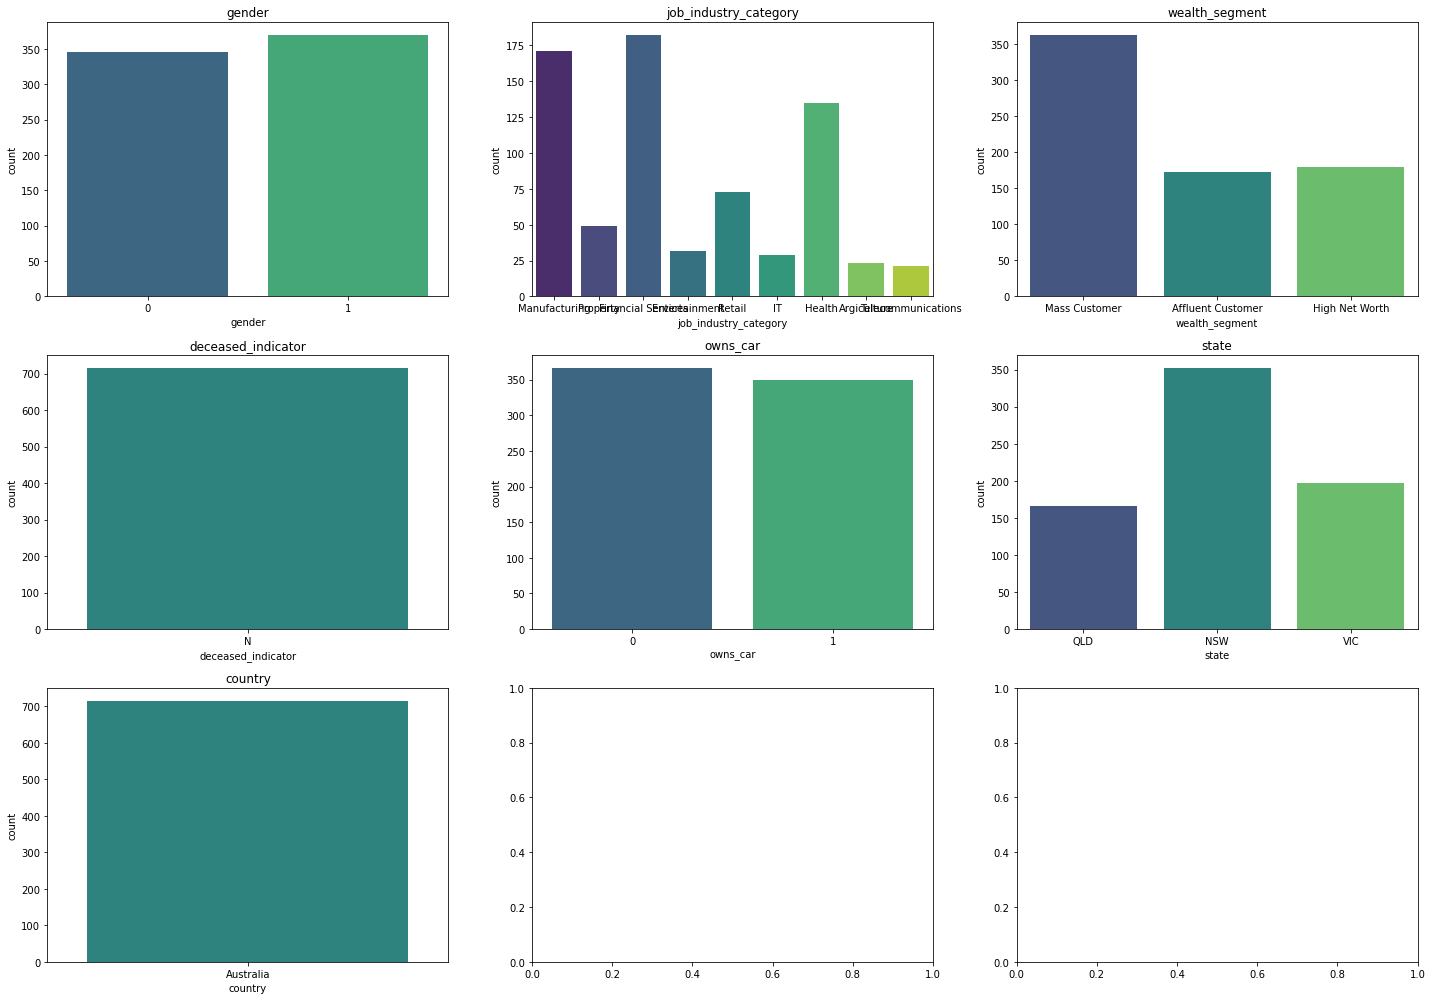

In [26]:

r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=NewCustomerList,x=NewCustomerList[i],palette='viridis',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show()    

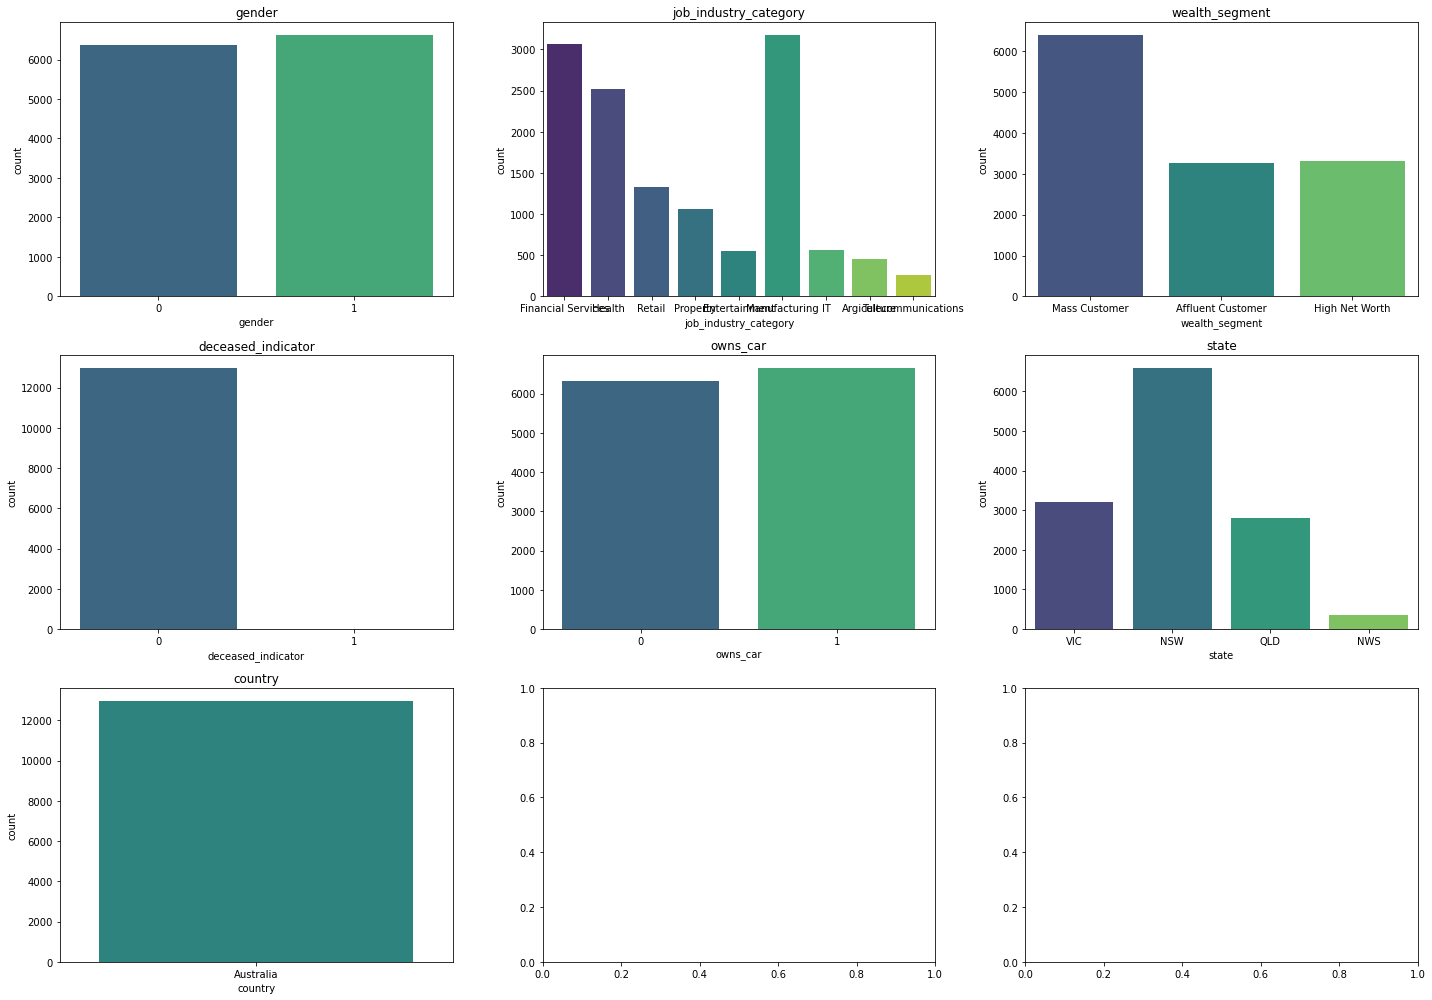

In [27]:

r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=OldCustomerList,x=OldCustomerList[i],palette='viridis',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show()  

<Figure size 1440x864 with 0 Axes>

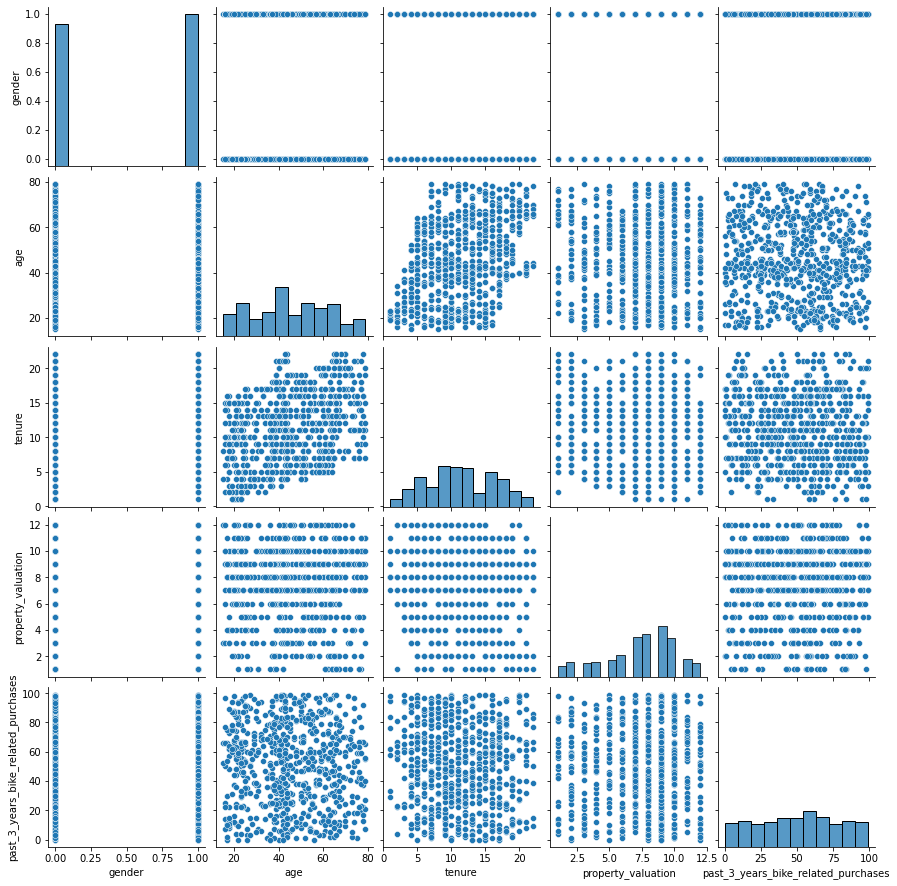

In [28]:
plt.figure(figsize=(20,12))
sns.pairplot(NewCustomerList[[ 'gender', 'age','tenure','property_valuation','past_3_years_bike_related_purchases']])

In [29]:
OldCustomerList['product_first_sold_date'] = pd.to_datetime(OldCustomerList['product_first_sold_date'])
OldCustomerList['product_first_sold_date'].head(5)


0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
5   1970-01-01 10:50:31
Name: product_first_sold_date, dtype: datetime64[ns]

In [30]:
OldCustomerList['transaction_date'] = pd.to_datetime(OldCustomerList['transaction_date'])


In [31]:
# Convert 'day' to Timestamp (if it's not already)
day = "2017-12-31"
day = pd.to_datetime(day)


In [32]:
# Calculate Recency
Recency = OldCustomerList.groupby('customer_id').agg({"transaction_date": lambda x: ((day - x.max()).days)})
Recency = Recency.rename(columns={'transaction_date': 'recency'})
Recency.head(10)

,recency
customer_id,
1,8
2,129
9,79
12,68
13,28
14,48
15,36
19,281
20,32


In [33]:
OldCustomerList = OldCustomerList.merge(Recency, on='customer_id', how='left')

In [34]:
OldCustomerList['recency'].fillna(OldCustomerList['recency'].mean(), inplace=True)

In [35]:
Frequency = OldCustomerList.groupby('customer_id').count()
Frequency = Frequency.loc[:, ['transaction_id']]
Frequency =  Frequency.rename(columns={'transaction_id': 'frequency'})
Frequency.head(5)

,frequency
customer_id,
1,11
2,3
9,6
12,7
13,7


In [36]:
OldCustomerList = OldCustomerList.merge(Frequency, on='customer_id', how='left')

In [37]:
Approved = OldCustomerList.loc[OldCustomerList['order_status'] == 'Approved'].groupby('customer_id').count()
Approved = Approved.loc[:, ['transaction_id']]
Approved =  Approved.rename(columns={'transaction_id': '% approved'})
Approved['% approved'] = Approved['% approved'] * 100 / Frequency['frequency']
Approved.head(5)  

,% approved
customer_id,
1,100.0
2,100.0
9,100.0
12,100.0
13,100.0


In [38]:
OldCustomerList = OldCustomerList.merge(Approved, on='customer_id', how='left')
OldCustomerList['% approved'].fillna(OldCustomerList['% approved'].mean(), inplace=True)

In [39]:
# Monetary
Monetary = OldCustomerList.loc[OldCustomerList['order_status'] == 'Approved'].groupby('customer_id').agg({'list_price': 'sum', 'standard_cost': 'sum'})
Monetary['monetary'] = Monetary['list_price'] - Monetary['standard_cost']
Monetary

,list_price,standard_cost,monetary
customer_id,,,
1,9084.45,6066.36,3018.09
2,4149.07,1922.81,2226.26
9,5357.55,3004.44,2353.11
12,6394.21,2854.18,3540.03
13,7734.74,3397.36,4337.38
...,...,...,...
3493,10053.82,6324.94,3728.88
3494,5122.71,2367.60,2755.11
3495,8626.65,4779.00,3847.65


In [40]:
OldCustomerList = OldCustomerList.merge(Monetary, on='customer_id', how='left')
OldCustomerList['monetary'].fillna(0, inplace=True)

In [41]:
OldCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12970 non-null  int64         
 1   product_id                           12970 non-null  int64         
 2   customer_id                          12970 non-null  int64         
 3   transaction_date                     12970 non-null  datetime64[ns]
 4   online_order                         12970 non-null  float64       
 5   order_status                         12970 non-null  object        
 6   brand                                12970 non-null  object        
 7   product_line                         12970 non-null  object        
 8   product_class                        12970 non-null  object        
 9   product_size                         12970 non-null  object        
 10  list_price

In [42]:
OldCustomerList['age'].value_counts()

39    803
40    644
43    570
41    538
38    432
37    390
42    389
44    374
31    351
58    335
32    315
53    303
22    296
48    287
36    281
28    280
30    273
50    269
19    264
25    260
23    257
29    247
49    235
52    231
20    231
21    220
46    217
61    216
55    213
18    203
51    196
45    195
54    193
59    193
24    188
60    182
56    179
27    178
57    168
63    168
47    166
62    154
26    150
17    138
35    123
34    123
16    112
33    108
64     96
86     10
15      9
74      7
73      5
82      5
Name: age, dtype: int64

In [43]:
OldCustomerList['frequency'] = OldCustomerList['frequency'].fillna(0)
OldCustomerList['frequency'] = OldCustomerList['frequency'].astype(int)

In [44]:
OldCustomerList['tenure'] = OldCustomerList['tenure'].fillna(OldCustomerList['tenure'].mean())
OldCustomerList['tenure'] = OldCustomerList['tenure'].astype(int)

In [45]:
cat=[]
con=[]
for i in OldCustomerList.columns:
    if OldCustomerList[i].nunique()<10:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'Cat':cat,'Con':con},headers=['Categorical','Continuous']))            

Categorical            Continuous
---------------------  -----------------------------------
online_order           transaction_id
order_status           product_id
brand                  customer_id
product_line           transaction_date
product_class          list_price_x
product_size           standard_cost_x
gender                 product_first_sold_date
job_industry_category  first_name
wealth_segment         last_name
deceased_indicator     past_3_years_bike_related_purchases
owns_car               DOB
state                  job_title
country                tenure
                       address
                       postcode
                       property_valuation
                       age
                       recency
                       frequency
                       % approved
                       list_price_y
                       standard_cost_y
                       monetary


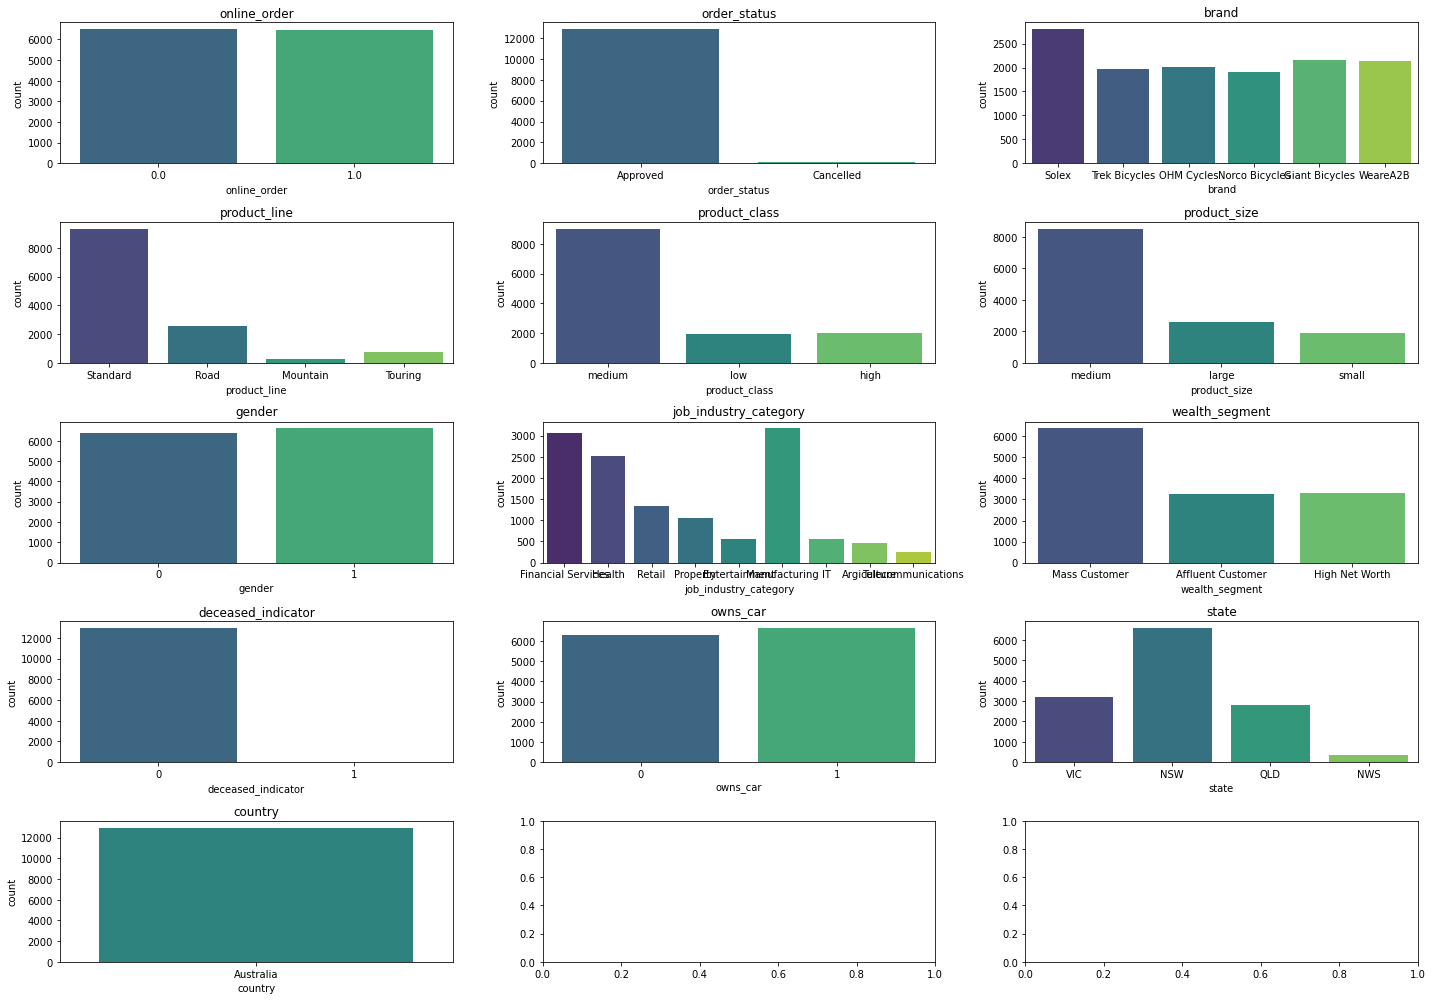

In [46]:

r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=OldCustomerList,x=OldCustomerList[i],palette='viridis',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show()  

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


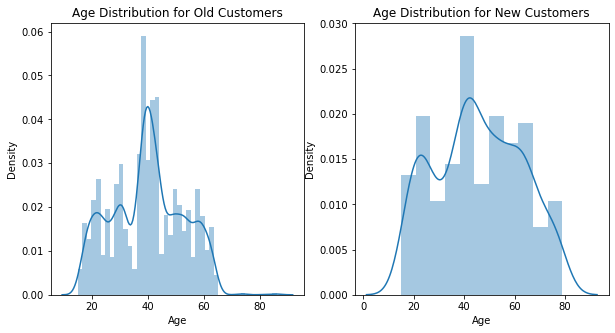

In [47]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.distplot(OldCustomerList['age'], ax=axs[0]);
axs[0].set_title('Age Distribution for Old Customers')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Density')

# Plot the second subplot
sns.distplot(NewCustomerList['age'], ax=axs[1]);
axs[1].set_title('Age Distribution for New Customers')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Density')

plt.show()

In [48]:
with pd.option_context('display.width', None):
    display(pd.concat([NewCustomerList['age'].describe(), OldCustomerList['age'].describe()], axis=1))

,age,age
count,715.000000,12970.000000
mean,45.667133,39.813107
std,17.048160,12.511193
min,15.000000,15.000000
25%,32.000000,30.000000
50%,44.000000,40.000000
75%,60.000000,49.000000
max,79.000000,86.000000


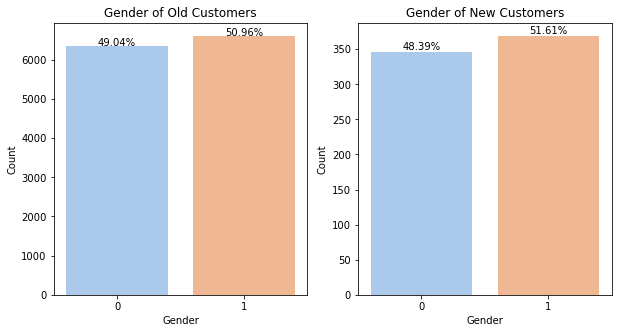

In [49]:
custom_palette = sns.color_palette('pastel', n_colors=2)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="gender", data=OldCustomerList, palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center")
axs[0].set_title('Gender of Old Customers')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')


# Plot the first subplot
sns.countplot(x="gender", data=NewCustomerList, palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")
axs[1].set_title('Gender of New Customers')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.show()

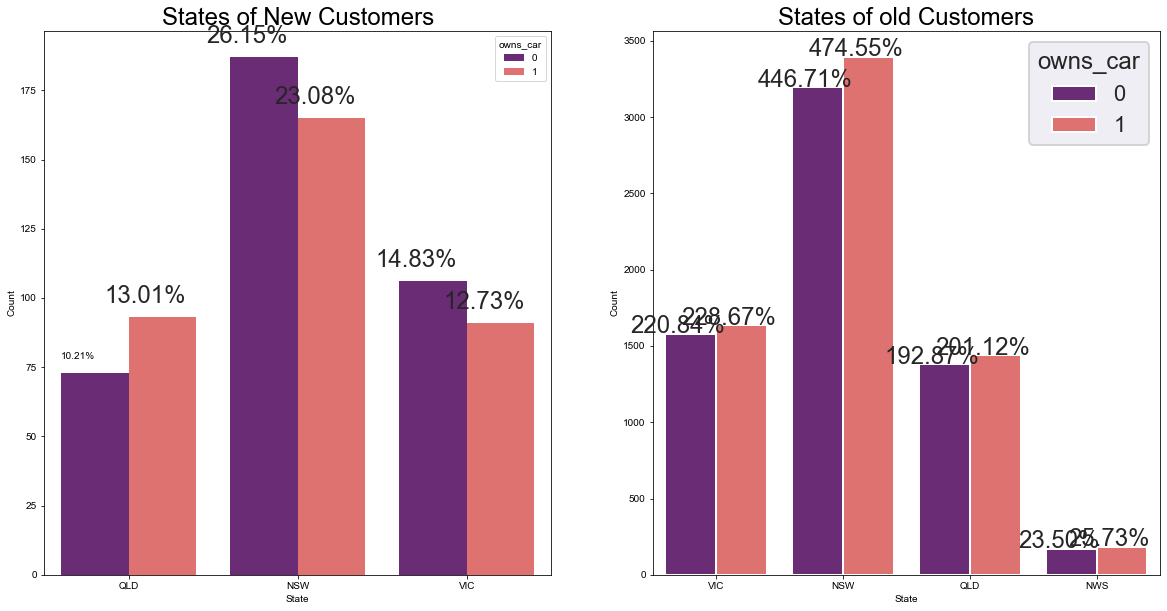

In [50]:
custom_palette = sns.color_palette('pastel', n_colors=2)
fig, axs = plt.subplots(ncols=2, figsize=(20,10))
ax = sns.countplot( x ="state", data=NewCustomerList, palette=("magma"),hue='owns_car',ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 4.,
            height + 5,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")
    axs[0].set_title('States of New Customers')
    axs[0].set_xlabel('State')
    axs[0].set_ylabel('Count')
    sns.set(rc={'figure.figsize':(20.7,3.30)})
    sns.set_context("poster")
    
ax = sns.countplot( x ="state", data=OldCustomerList, palette=("magma"),hue='owns_car',ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 4.,
            height + 5,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")
    
    axs[1].set_title('States of old Customers')
    axs[1].set_xlabel('State')
    axs[1].set_ylabel('Count')
    sns.set(rc={'figure.figsize':(20.7,3.30)})
    sns.set_context("poster")

plt.show()

In [51]:
import pandas as pd

# Assuming you have already calculated 'recency', 'frequency', and 'monetary' columns in OldCustomerList DataFrame

# Calculate means and sums for 'recency', 'frequency', and 'monetary' by 'gender'
rfm_means = pd.DataFrame({
    'gender': [0, 1],
    'recency': OldCustomerList.groupby(['gender'])['recency'].mean().tolist(),
    'frequency': OldCustomerList.groupby(['gender'])['frequency'].mean().tolist(),
    'frequencies': OldCustomerList.groupby(['gender'])['frequency'].sum().tolist(),
    'monetary': OldCustomerList.groupby(['gender'])['monetary'].mean().tolist(),
    'monetaries': OldCustomerList.groupby(['gender'])['monetary'].sum().tolist(),
})

# Display the resulting DataFrame
print(rfm_means)

   gender    recency  frequency  frequencies     monetary   monetaries
0       0  53.240881   6.517610        41452  3618.378366  23012886.41
1       1  54.516036   6.488956        42892  3500.395159  23137612.00


Text(0.5, 1.0, 'Average Recency per Gender')

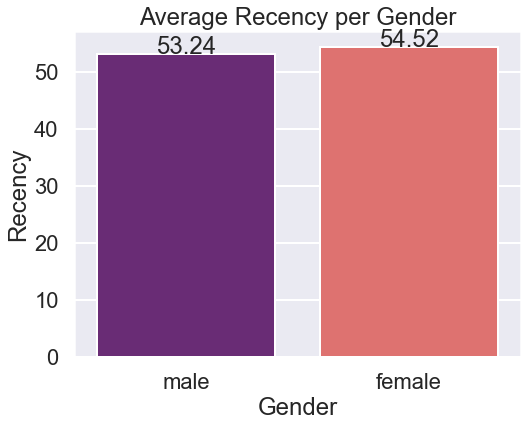

In [52]:
rfm_means['gender'] = rfm_means['gender'].replace({0: 'male', 1: 'female'})

# Set the custom color palette
custom_palette = sns.color_palette('magma', n_colors=2)
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot
ax = sns.barplot(data=rfm_means, x='gender', y='recency', palette=custom_palette)

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}'.format(height),
            ha="center")

# Set axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Recency')
ax.set_title("Average Recency per Gender")

In [53]:
frequency = OldCustomerList.groupby(['state'])['frequency'].sum().tolist()
monetory = OldCustomerList.groupby(['state'])['monetary'].sum().tolist()
recency = OldCustomerList.groupby(['state'])['recency'].mean().tolist()

state_nt = pd.DataFrame({'state': sorted(OldCustomerList['state'].value_counts().index.tolist()), 
                         'frequency': frequency, 
                         'monetary': monetory,
                         'recency': recency,
                        })

state_nt

,state,frequency,monetary,recency
0,NSW,42451,23403908.86,53.568696
1,NWS,2330,1136547.64,53.210227
2,QLD,18685,10092610.98,52.658502
3,VIC,20878,11517430.93,55.705352


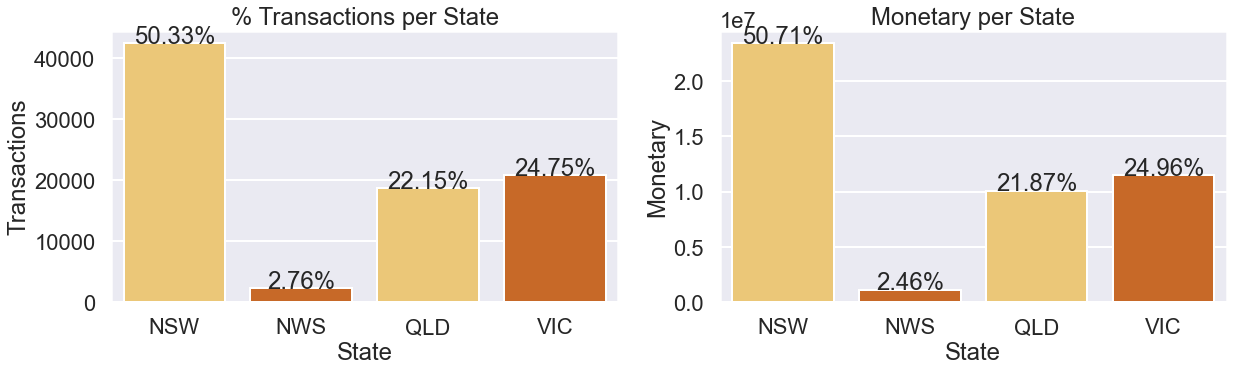

In [54]:
custom_palette = sns.color_palette("YlOrBr", n_colors=2)

# Create the first subplot with seaborn (barplot)
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

# Plot the first subplot (barplot) for 'frequency'
sns.barplot(data=state_nt, x='state', y='frequency', palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
                height + 3.2,
                '{:.2f}%'.format((height / state_nt['frequency'].sum()) * 100),
                ha="center")
axs[0].set_title("% Transactions per State")
axs[0].set_xlabel('State')
axs[0].set_ylabel('Transactions')

# Plot the second subplot (barplot) for 'monetary'
sns.barplot(data=state_nt, x='state', y='monetary', palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
                height + 1,
                '{:.2f}%'.format((height / state_nt['monetary'].sum()) * 100),
                ha="center")
axs[1].set_title('Monetary per State')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Monetary')

plt.show()

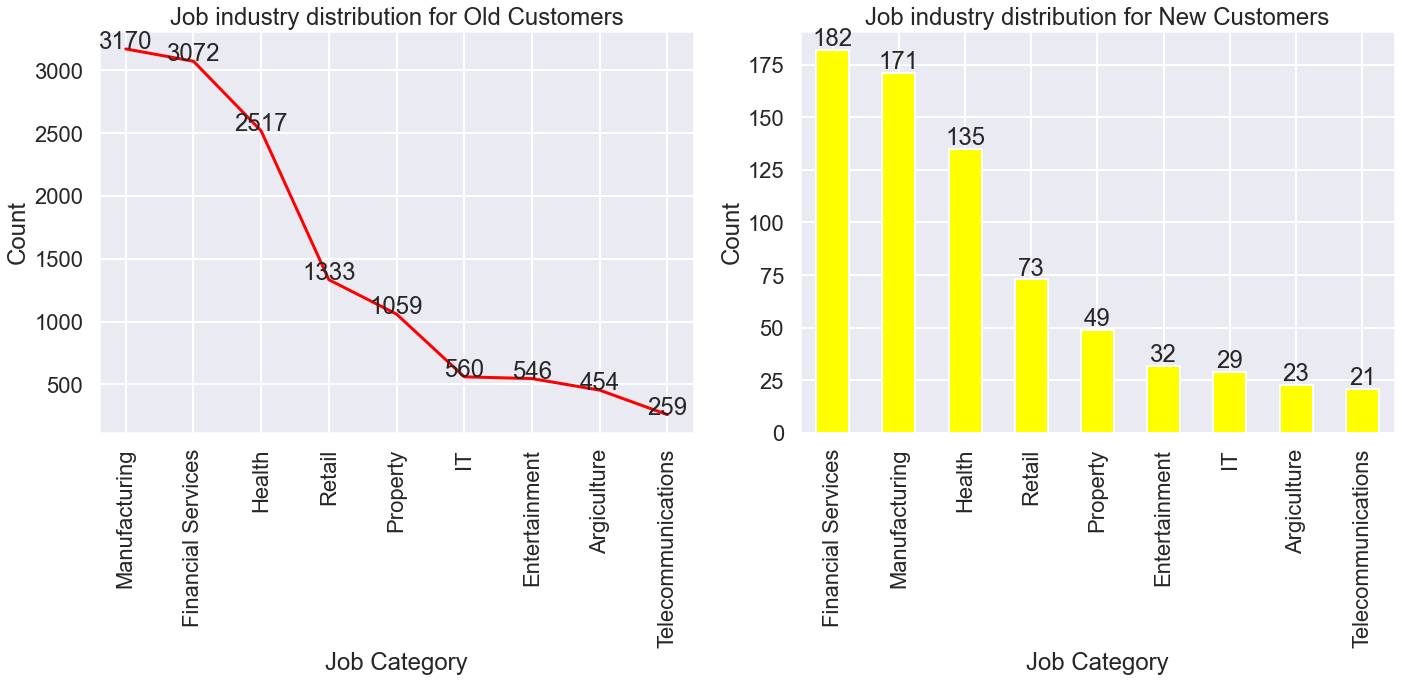

In [55]:

# Calculate the counts of job industry categories for old and new customers
old_customer_counts = OldCustomerList['job_industry_category'].value_counts()
new_customer_counts = NewCustomerList['job_industry_category'].value_counts()

# Create the figure and subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Plot the first subplot for old customers
old_customer_counts.plot(kind='line', ax=axs[0], color='red')
for i, v in enumerate(old_customer_counts):
    axs[0].text(i, v + 3, str(v), ha='center')

axs[0].set_title("Job industry distribution for Old Customers")
axs[0].set_xlabel('Job Category')
axs[0].set_xticks(range(len(old_customer_counts)))  # Set the tick locations
axs[0].set_xticklabels(old_customer_counts.index, rotation=90)
axs[0].set_ylabel('Count')


# Plot the second subplot for new customers
new_customer_counts.plot(kind='bar', ax=axs[1], color='yellow')
for i, v in enumerate(new_customer_counts):
    axs[1].text(i, v + 2, str(v), ha='center')

axs[1].set_title("Job industry distribution for New Customers")
axs[1].set_xlabel('Job Category')
axs[1].set_xticks(range(len(new_customer_counts)))  # Set the tick locations
axs[1].set_xticklabels(new_customer_counts.index, rotation=90)
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


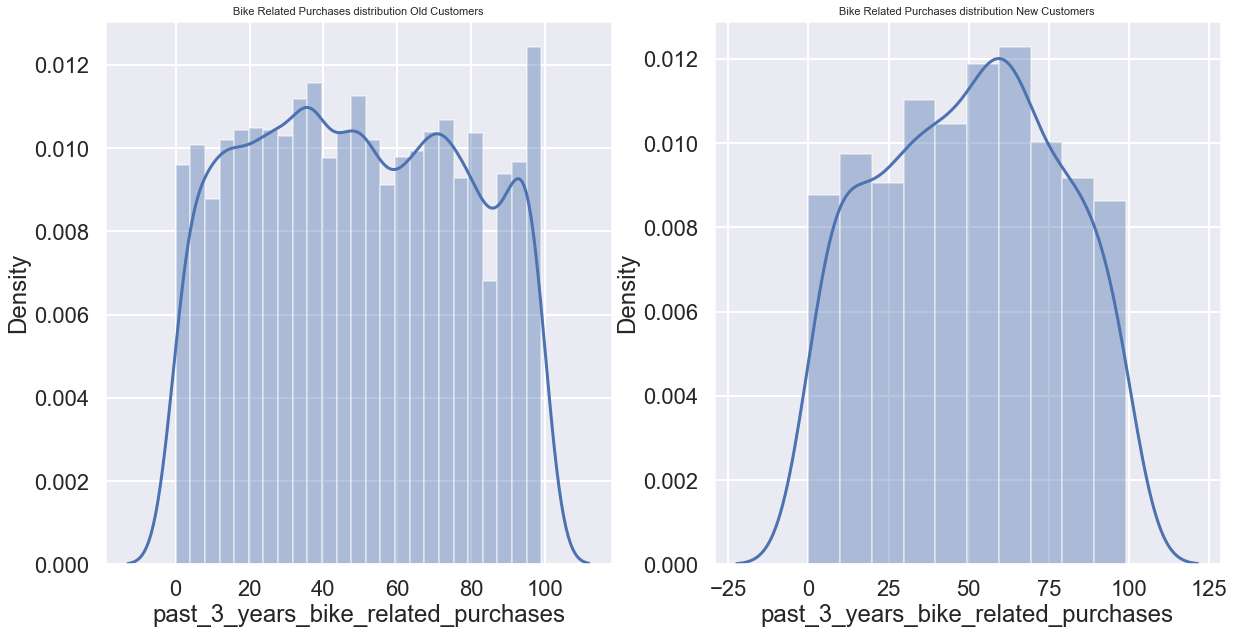

In [56]:
fig, axs = plt.subplots(ncols=2, figsize=(20,10))

# Plot the first subplot
sns.distplot(OldCustomerList['past_3_years_bike_related_purchases'], ax=axs[0]);
axs[0].set_title('Bike Related Purchases distribution Old Customers', fontsize=11)

# Plot the second subplot
sns.distplot(NewCustomerList['past_3_years_bike_related_purchases'], ax=axs[1]);
axs[1].set_title('Bike Related Purchases distribution New Customers', fontsize=11)

plt.show()

In [57]:
with pd.option_context('display.width', None):
    display(pd.concat([
        NewCustomerList['past_3_years_bike_related_purchases'].describe(),
        pd.DataFrame(OldCustomerList['past_3_years_bike_related_purchases'].describe())
    ], axis=1))

,past_3_years_bike_related_purchases,past_3_years_bike_related_purchases
count,715.000000,12970.000000
mean,49.806993,49.300848
std,27.735227,28.656931
min,0.000000,0.000000
25%,27.000000,25.000000
50%,51.000000,48.000000
75%,71.500000,73.000000
max,99.000000,99.000000


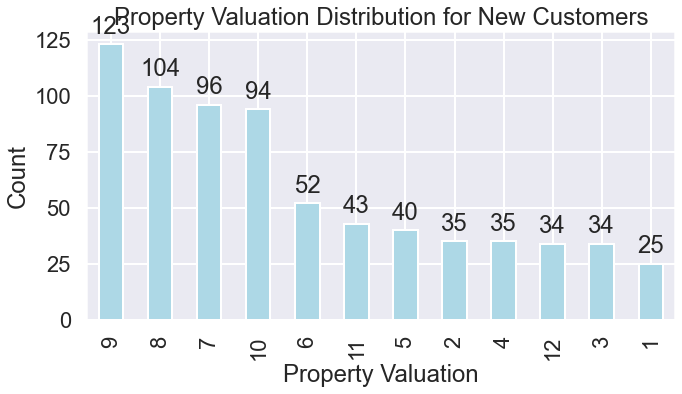

In [58]:
property_valuation_counts = NewCustomerList['property_valuation'].value_counts()

# Create the 2D bar plot
plt.figure(figsize=(10, 6))
property_valuation_counts.plot(kind='bar', color='lightblue')

# Add labels to the bars
for i, v in enumerate(property_valuation_counts):
    plt.text(i, v + 5, str(v), ha='center')

# Set axis labels and title
plt.xlabel('Property Valuation')
plt.ylabel('Count')
plt.title('Property Valuation Distribution for New Customers')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

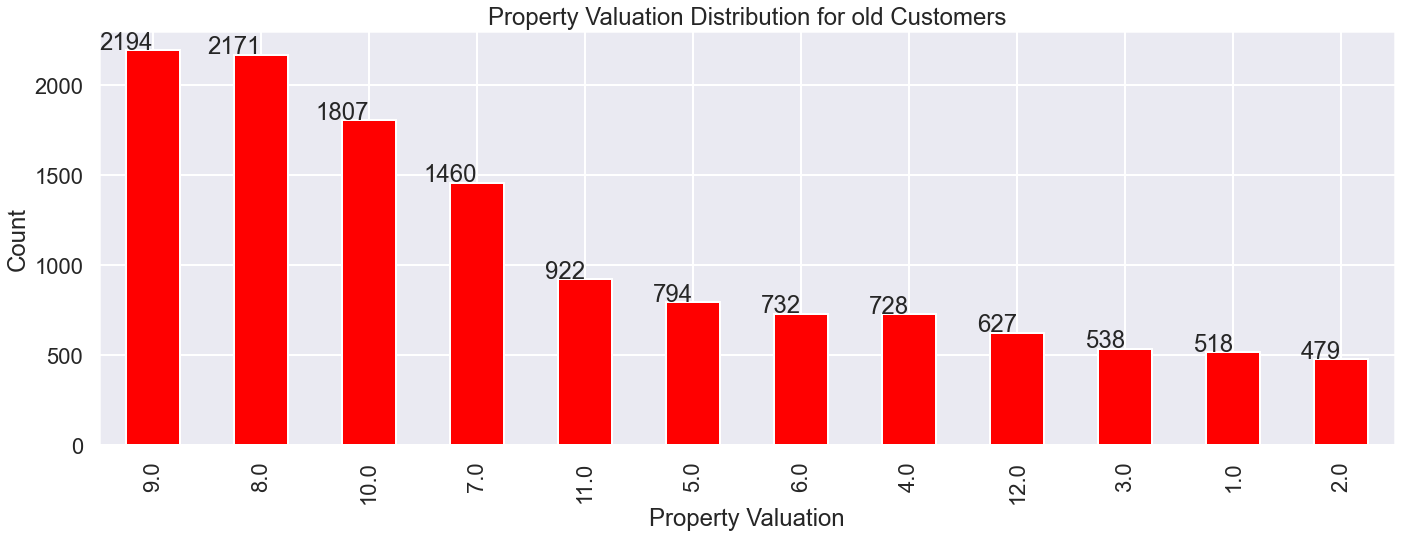

In [59]:
property_valuation_counts = OldCustomerList['property_valuation'].value_counts()
plt.figure(figsize=(20, 8))
property_valuation_counts.plot(kind='bar', color='red')

# Add labels to the bars
for i, v in enumerate(property_valuation_counts):
    plt.text(i, v + 5, str(v), ha='right')

# Set axis labels and title
plt.xlabel('Property Valuation')
plt.ylabel('Count')
plt.title('Property Valuation Distribution for old Customers')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

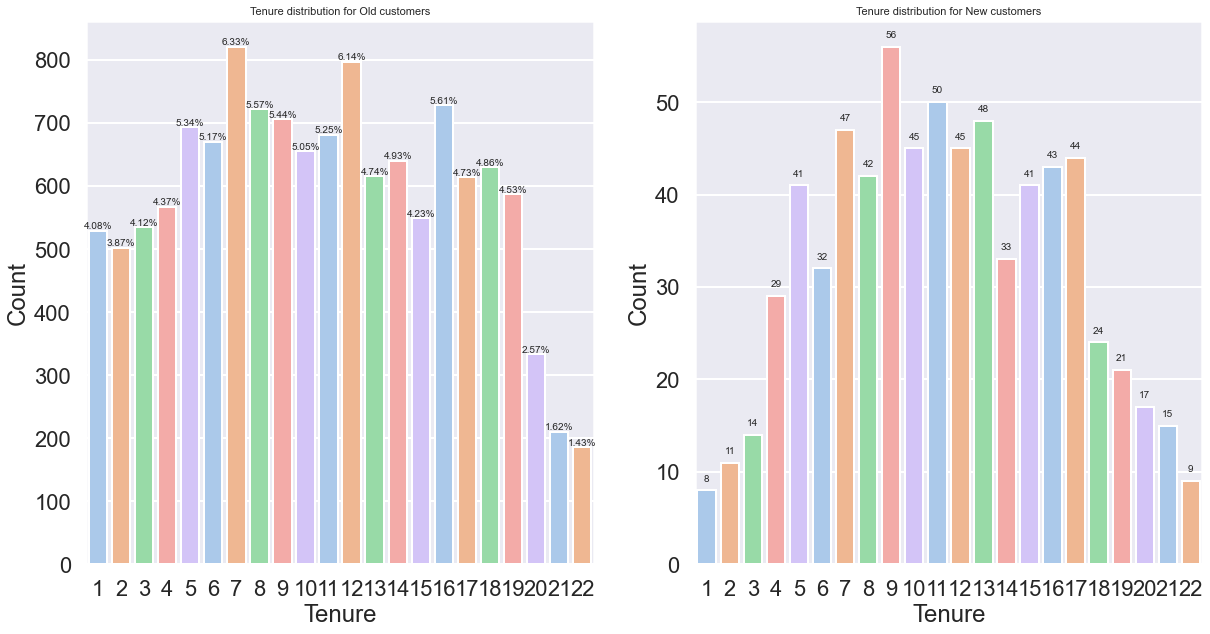

In [60]:
custom_palette = sns.color_palette('pastel', n_colors=5)
fig, axs = plt.subplots(ncols=2, figsize=(20,10))

# Plot the first subplot
sns.countplot(x="tenure", data=OldCustomerList, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center",
            fontsize=10)
    
axs[0].set_title('Tenure distribution for Old customers', fontsize=11)
axs[0].set_xlabel('Tenure')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="tenure", data=NewCustomerList, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.0f}'.format(height),
            ha="center",
            fontsize=10)
    
axs[1].set_title('Tenure distribution for New customers', fontsize=11)
axs[1].set_xlabel('Tenure')
axs[1].set_ylabel('Count')

plt.show()

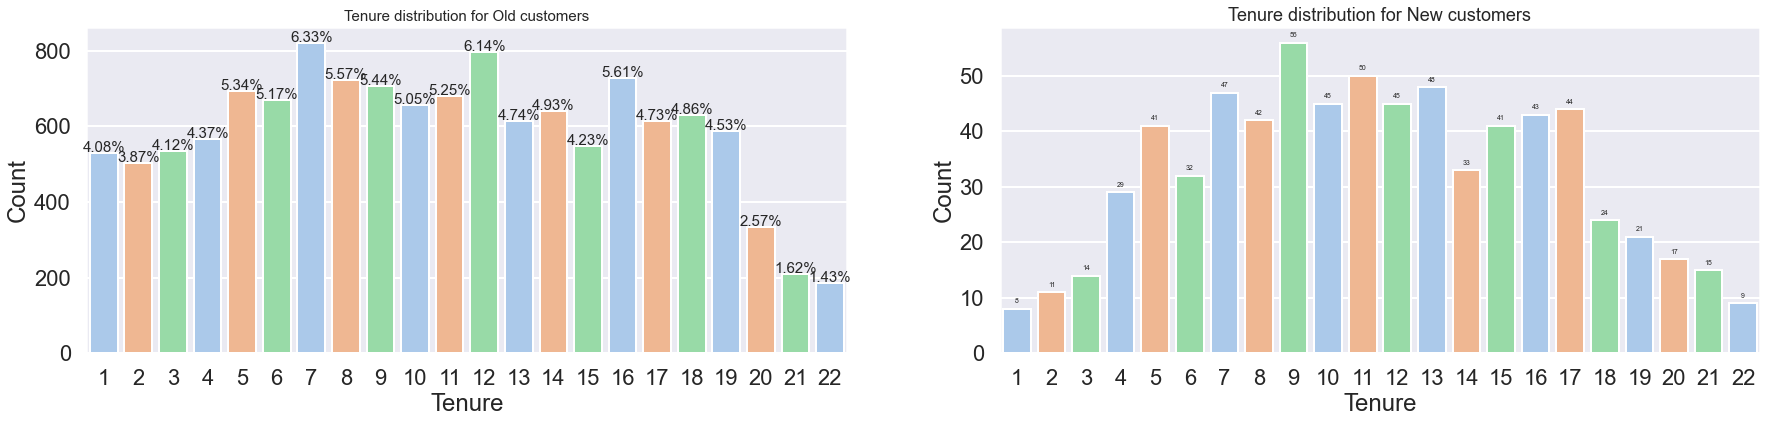

In [61]:
custom_palette = sns.color_palette('pastel', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(30,6))

# Plot the first subplot
sns.countplot(x="tenure", data=OldCustomerList, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center",
            fontsize=15)
    
axs[0].set_title('Tenure distribution for Old customers', fontsize=15)
axs[0].set_xlabel('Tenure')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="tenure", data=NewCustomerList, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.0f}'.format(height),
            ha="center",
            fontsize=7)
    
axs[1].set_title('Tenure distribution for New customers', fontsize=18)
axs[1].set_xlabel('Tenure')
axs[1].set_ylabel('Count')

plt.show()

In [62]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    int64         
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    int64         
 10  tenure        

In [63]:
OldCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12970 non-null  int64         
 1   product_id                           12970 non-null  int64         
 2   customer_id                          12970 non-null  int64         
 3   transaction_date                     12970 non-null  datetime64[ns]
 4   online_order                         12970 non-null  float64       
 5   order_status                         12970 non-null  object        
 6   brand                                12970 non-null  object        
 7   product_line                         12970 non-null  object        
 8   product_class                        12970 non-null  object        
 9   product_size                         12970 non-null  object        
 10  list_price

In [64]:
OldCustomerList['price_difference'] = OldCustomerList['list_price_x'] -OldCustomerList['standard_cost_x']



In [65]:
selected_columns = ['recency', 'frequency', 'monetary', 'age','state','standard_cost_x','list_price_x','price_difference']

df = OldCustomerList[selected_columns]

In [66]:
df.head()

,recency,frequency,monetary,age,state,standard_cost_x,list_price_x,price_difference
0,76,3,645.99,62,VIC,53.62,71.49,17.87
1,21,7,4179.11,38,NSW,388.92,2091.47,1702.55
2,57,6,4965.43,40,NSW,248.82,1793.43,1544.61
3,122,7,3983.97,55,NSW,381.10,1198.46,817.36
4,12,8,2368.37,59,NSW,829.65,1538.99,709.34


In [67]:
OldCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12970 non-null  int64         
 1   product_id                           12970 non-null  int64         
 2   customer_id                          12970 non-null  int64         
 3   transaction_date                     12970 non-null  datetime64[ns]
 4   online_order                         12970 non-null  float64       
 5   order_status                         12970 non-null  object        
 6   brand                                12970 non-null  object        
 7   product_line                         12970 non-null  object        
 8   product_class                        12970 non-null  object        
 9   product_size                         12970 non-null  object        
 10  list_price

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [141]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [142]:
df['age_bracket'] = pd.cut(df['age'], bins=[0, 24, 34, 44, 54, 64, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])


C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\3450552376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bracket'] = pd.cut(df['age'], bins=[0, 24, 34, 44, 54, 64, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])


In [143]:
age_label_mapping = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65+': 5}

# Replace the age brackets with their corresponding numeric labels
df['age_bracket'] = df['age_bracket'].map(age_label_mapping)

# Convert the 'age_bracket' column to int32
df['age_bracket'] = df['age_bracket'].astype('int32')

C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\3626462048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bracket'] = df['age_bracket'].map(age_label_mapping)
C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\3626462048.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bracket'] = df['age_bracket'].astype('int32')


In [144]:
df['state']=label.fit_transform(df['state'])
df.head(10)

C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\681414059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state']=label.fit_transform(df['state'])


,recency,frequency,monetary,age,state,standard_cost_x,list_price_x,price_difference,age_bracket,age_encoded
0,76,3,645.99,62,3,53.62,71.49,17.87,4,4
1,21,7,4179.11,38,0,388.92,2091.47,1702.55,2,2
2,57,6,4965.43,40,0,248.82,1793.43,1544.61,2,2
3,122,7,3983.97,55,0,381.10,1198.46,817.36,4,4
4,12,8,2368.37,59,0,829.65,1538.99,709.34,4,4
5,134,5,1825.32,39,0,45.26,60.34,15.08,2,2
6,143,5,2825.00,47,2,380.74,1071.23,690.49,3,3
7,2,10,4290.81,58,2,161.60,1231.15,1069.55,4,4
8,74,11,2757.77,39,0,56.93,71.16,14.23,2,2
9,71,10,4544.16,64,0,154.40,1057.51,903.11,4,4


C:\Users\HOME\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

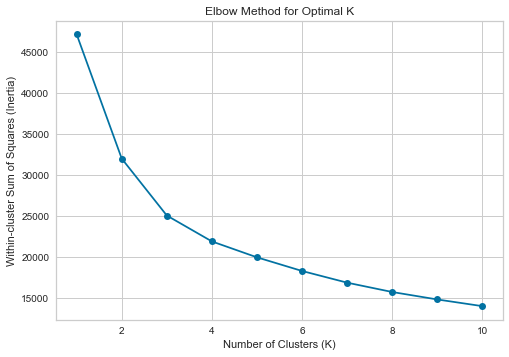

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\3973959006.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = kmeans_model.labels_


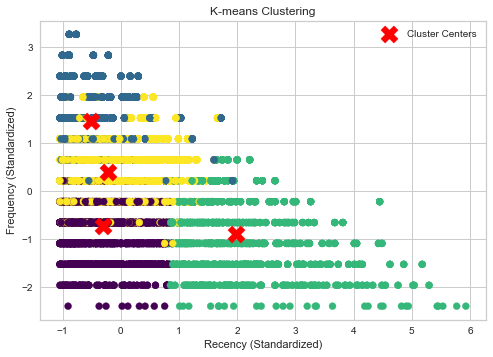

In [156]:
X_cluster = df[['recency', 'frequency', 'monetary']]

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_cluster_std = scaler.fit_transform(X_cluster)

# One-hot encode the 'state' column to handle categorical data
ohe = OneHotEncoder(sparse=False)
state_encoded = ohe.fit_transform(df[['state']])
X_cluster_std = np.hstack((X_cluster_std, state_encoded))

# Step 3: Determine the Number of Clusters (K)
# Let's use the Elbow Method to find the optimal value of K
inertia = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_cluster_std)
    inertia.append(kmeans_model.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow Method, let's choose K=4 or K=5 as the optimal number of clusters.

# Step 4: KMeans Clustering with Optimal K
k = 4  # Number of clusters (you can choose 4 or 5 based on the Elbow Method)
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X_cluster_std)

# Step 5: Add cluster labels to the DataFrame
df['cluster_label'] = kmeans_model.labels_

# Step 6: Visualize Clusters
# Assuming 'X_cluster_std' has 5 features (recency, frequency, monetary, and one-hot encoded 'state')
# We can visualize the first two standardized features only for simplicity
plt.scatter(X_cluster_std[:, 0], X_cluster_std[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Recency (Standardized)')
plt.ylabel('Frequency (Standardized)')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [82]:
#std_scaler = StandardScaler()
#b = df.select_dtypes('number')
#std_scaler = StandardScaler()
#fin_rev_std = df
#scale_columns = ['state']
#fin_rev_std[scale_columns] = std_scaler.fit_transform(df[scale_columns])

In [83]:
df.head(2)

,recency,frequency,monetary,age,state,standard_cost_x,list_price_x,price_difference,age_bracket
0,76,3,645.99,62,3,53.62,71.49,17.87,4
1,21,7,4179.11,38,0,388.92,2091.47,1702.55,2


In [163]:
X_numerics = df[['frequency', 'monetary', 'state']]

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

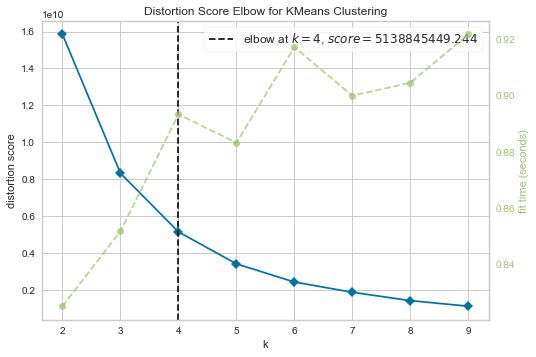

In [164]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

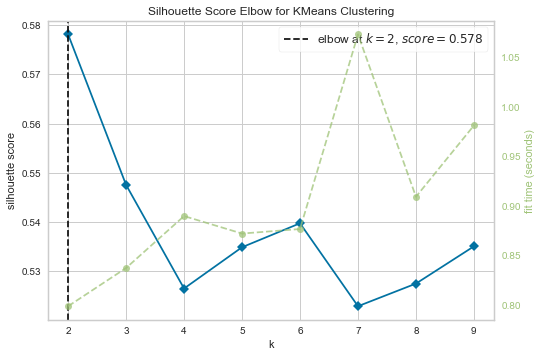

In [165]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [166]:
KM_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM3_clustered = X_numerics.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [172]:
corr=df.corr()['state'].sort_values(ascending=True)
corr

standard_cost_x     0.001525
price_difference    0.002401
list_price_x        0.003095
monetary            0.008572
recency             0.012140
age                 0.017321
frequency           0.018262
age_bracket         0.026163
age_encoded         0.026163
cluster_label       0.041225
state               1.000000
Name: state, dtype: float64

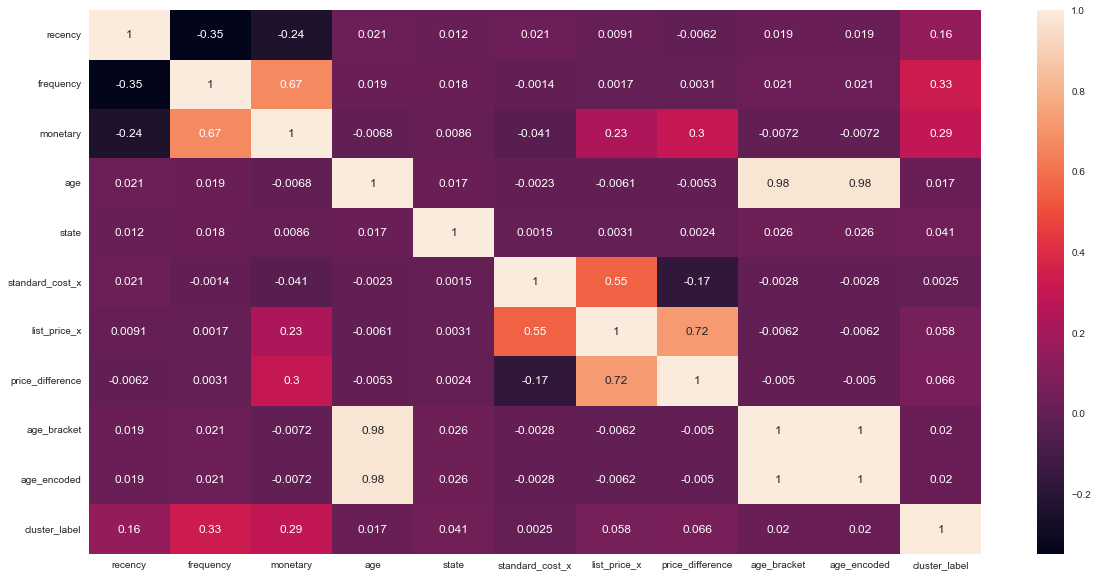

In [173]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
!pip install xgboost

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Data Preprocessing and Feature Engineering
# Calculate Age Bracket
df['age_bracket'] = pd.cut(df['age'], bins=[0, 24, 34, 44, 54, 64, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Encode the target variable 'age_bracket' into numeric labels
label_encoder = LabelEncoder()
df['age_encoded'] = label_encoder.fit_transform(OldCustomerList['age_bracket'])

# Step 2: Model Selection and Testing
# Define the predicted variable (high_margin_product) and features (income or any other relevant features)
X = df[['recency', 'monetary', 'frequency']]  # Replace 'other_feature1' and 'other_feature2' with relevant features
y = df['age_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax')
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\1239048727.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bracket'] = pd.cut(df['age'], bins=[0, 24, 34, 44, 54, 64, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\1239048727.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_encoded'] = label_encoder.fit_transform(OldCustomerList['age_bracket'])


Accuracy: 0.9163454124903624
Precision: 0.9204472621430249
Recall: 0.9163454124903624
F1 Score: 0.9161777951186
Confusion Matrix:
[[324   6  46   2   0   0]
 [  0 410  31   8   2   0]
 [  2   5 897  13   1   0]
 [  6   9  26 416   6   0]
 [  4   3  33  14 321   0]
 [  0   0   0   0   0   9]]


In [177]:
from sklearn.metrics import classification_report

# ... (previous code)

# Step 3: Model Evaluation
# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       18-24       0.96      0.86      0.91       378
       25-34       0.95      0.91      0.93       451
       35-44       0.87      0.98      0.92       918
       45-54       0.92      0.90      0.91       463
       55-64       0.97      0.86      0.91       375
         65+       1.00      1.00      1.00         9

    accuracy                           0.92      2594
   macro avg       0.95      0.92      0.93      2594
weighted avg       0.92      0.92      0.92      2594



C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\968714805.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['age_bracket'] = pd.cut(X_cluster['age'], bins=age_bins, labels=age_labels)
C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\968714805.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['age_encoded'] = LabelEncoder().fit_transform(X_cluster['age_bracket'])
C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\968714805.py:18: SettingWithCopyWarning: 
A value is trying to be set o

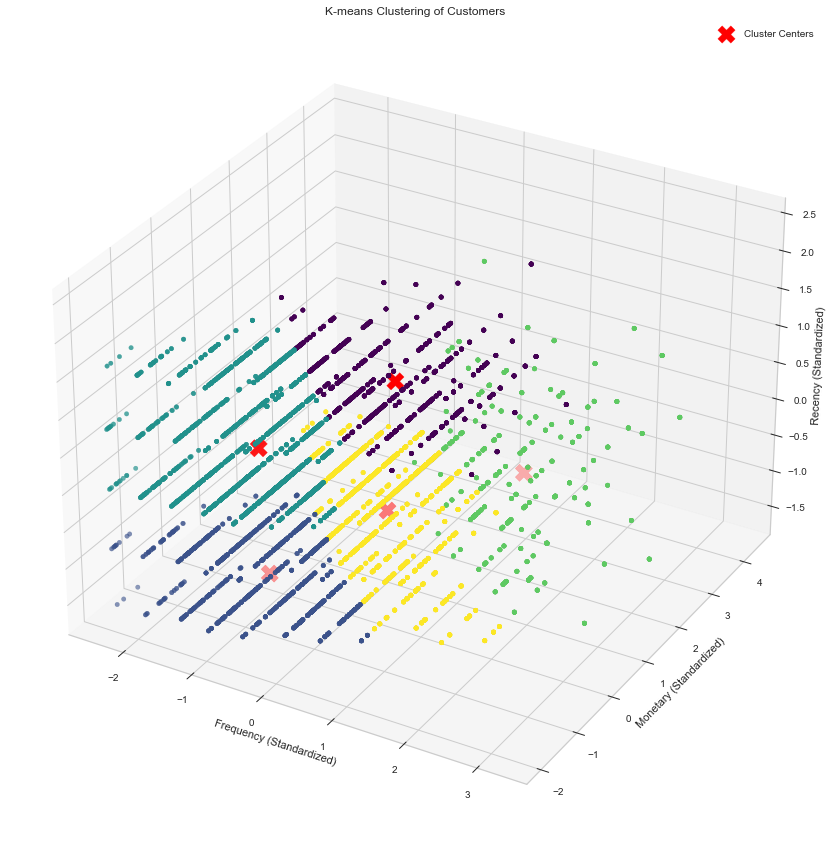

In [175]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
# Select the features for clustering
X_cluster = df[['age', 'frequency', 'monetary']]

# Convert the 'age' column to age brackets and encode them into numeric labels
age_bins = [0, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
X_cluster['age_bracket'] = pd.cut(X_cluster['age'], bins=age_bins, labels=age_labels)
X_cluster['age_encoded'] = LabelEncoder().fit_transform(X_cluster['age_bracket'])

# Drop the original 'age' and 'age_bracket' columns
X_cluster.drop(['age', 'age_bracket'], axis=1, inplace=True)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_cluster_std = scaler.fit_transform(X_cluster)

# Step 2: Model Training
# Choose the number of clusters (K) based on domain knowledge or using techniques like the Elbow Method
k = 5  # Change k based on your requirements
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X_cluster_std)

# Step 3: Model Evaluation (Clustering does not have a definitive evaluation metric like supervised learning)
# One way to evaluate is to visualize the clusters
X_cluster['cluster_label'] = kmeans_model.labels_

# Visualize the clusters in 3D (plotting only three features)
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_cluster_std[:, 0], X_cluster_std[:, 1], X_cluster_std[:, 2], c=kmeans_model.labels_, cmap='viridis')
ax.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Cluster Centers')
ax.set_xlabel('Frequency (Standardized)')
ax.set_ylabel('Monetary (Standardized)')
ax.set_zlabel('Recency (Standardized)')
ax.set_title('K-means Clustering of Customers')
plt.legend()
plt.show()

# Step 4: Interpretation
# Analyze the characteristics of each cluster to gain insights into customer segments.
# You can use domain knowledge or further analysis to understand the behavior of each cluster.

# Further analysis and interpretation can be added based on the clustering results.


In [178]:
df['cluster_label'] = kmeans_model.labels_

# Group the data by cluster label and calculate the mean or median values of each feature
summary_report = df.groupby('cluster_label').agg({'age_encoded': 'count',
                                                  'age': 'mean',
                                                  'frequency': 'mean',
                                                  'monetary': 'mean'})

# Rename the columns in the summary report for clarity
summary_report.rename(columns={'age_encoded': 'Number of Customers',
                               'age': 'Mean Age',
                               'frequency': 'Mean Frequency',
                               'monetary': 'Mean Monetary'}, inplace=True)

# Display the summary report
print(summary_report)

               Number of Customers   Mean Age  Mean Frequency  Mean Monetary
cluster_label                                                               
0                             1192  38.359060       10.144295    7031.555076
1                             3103  39.456977        4.813729    2334.732172
2                             3005  39.413311        4.590017    2030.448529
3                             2601  41.078047        8.110342    4565.990277
4                             3069  40.057348        7.307592    4088.163014


C:\Users\HOME\AppData\Local\Temp\ipykernel_13412\540900233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = kmeans_model.labels_


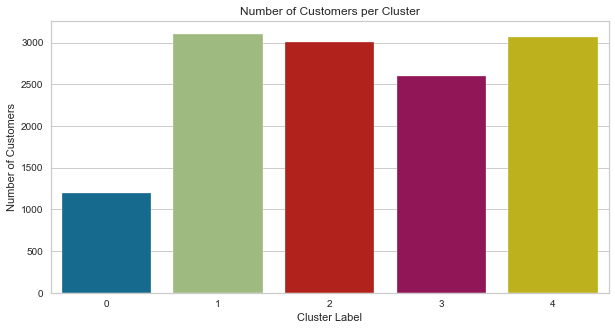

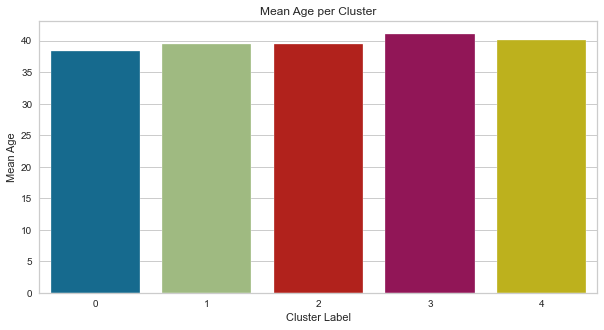

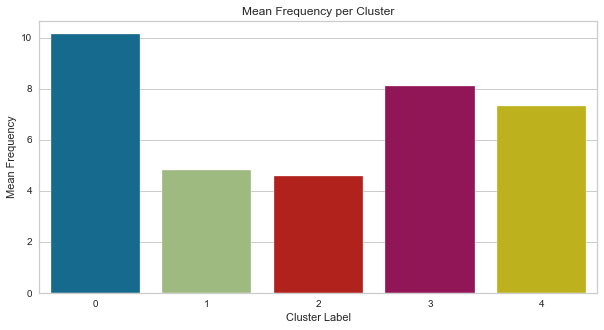

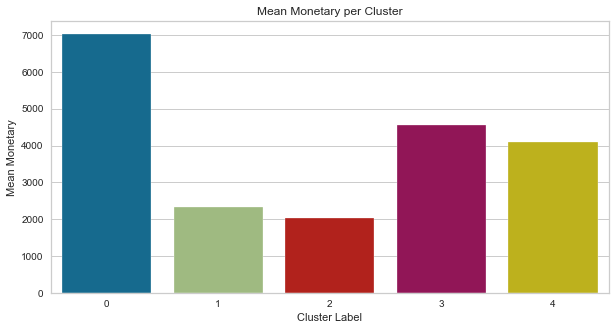

Cluster: 18-24
Cluster  precision  recall  f1-score  support
  18-24       0.96    0.86      0.91      378


Cluster: 25-34
Cluster  precision  recall  f1-score  support
  25-34       0.95    0.91      0.93      451


Cluster: 35-44
Cluster  precision  recall  f1-score  support
  35-44       0.87    0.98      0.92      918


Cluster: 45-54
Cluster  precision  recall  f1-score  support
  45-54       0.92     0.9      0.91      463


Cluster: 55-64
Cluster  precision  recall  f1-score  support
  55-64       0.97    0.86      0.91      375


Cluster: 65+
Cluster  precision  recall  f1-score  support
    65+        1.0     1.0       1.0        9




In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for cluster summary
cluster_data = {
    'cluster_label': [0, 1, 2, 3, 4],
    'Number of Customers': [1192, 3103, 3005, 2601, 3069],
    'Mean Age': [38.36, 39.46, 39.41, 41.08, 40.06],
    'Mean Frequency': [10.14, 4.81, 4.59, 8.11, 7.31],
    'Mean Monetary': [7031.56, 2334.73, 2030.45, 4565.99, 4088.16]
}

# Create a DataFrame to store cluster summary
df_cluster_summary = pd.DataFrame(cluster_data)

# Sample data for classification report
classification_report_data = {
    'Cluster': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    'precision': [0.96, 0.95, 0.87, 0.92, 0.97, 1.00],
    'recall': [0.86, 0.91, 0.98, 0.90, 0.86, 1.00],
    'f1-score': [0.91, 0.93, 0.92, 0.91, 0.91, 1.00],
    'support': [378, 451, 918, 463, 375, 9]
}

# Create a DataFrame to store classification report
df_classification_report = pd.DataFrame(classification_report_data)

# Plot cluster summary
plt.figure(figsize=(10, 5))
sns.barplot(x='cluster_label', y='Number of Customers', data=df_cluster_summary)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Cluster')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='cluster_label', y='Mean Age', data=df_cluster_summary)
plt.xlabel('Cluster Label')
plt.ylabel('Mean Age')
plt.title('Mean Age per Cluster')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='cluster_label', y='Mean Frequency', data=df_cluster_summary)
plt.xlabel('Cluster Label')
plt.ylabel('Mean Frequency')
plt.title('Mean Frequency per Cluster')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='cluster_label', y='Mean Monetary', data=df_cluster_summary)
plt.xlabel('Cluster Label')
plt.ylabel('Mean Monetary')
plt.title('Mean Monetary per Cluster')
plt.show()

# Print classification report for each model
for cluster_label in df_classification_report['Cluster']:
    print(f"Cluster: {cluster_label}")
    print(df_classification_report[df_classification_report['Cluster'] == cluster_label].to_string(index=False))
    print("\n")
